In [211]:
#Read the input file

import pandas as pd

df = pd.read_csv('Country-data.csv')

In [213]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [214]:
df.shape

(167, 10)

In [73]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [74]:
df.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [75]:
# Remove the country column in the dataframe

df_new = df[['child_mort','exports','health','imports' , 'income','inflation' , 'life_expec' , 'total_fer' , 'gdpp']]

In [76]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
df_new.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


In [77]:
#Standardize the numerical columns
normalized_df=(df_new-df_new.mean())/df_new.std()
normalized_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.287660,-1.134867,0.278251,-0.082208,-0.805822,0.156864,-1.614237,1.897176,-0.677143
1,-0.537333,-0.478220,-0.096725,0.070624,-0.374243,-0.311411,0.645924,-0.857394,-0.484167
2,-0.272015,-0.098824,-0.963176,-0.639838,-0.220182,0.786908,0.668413,-0.038289,-0.463980
3,2.001787,0.773056,-1.443729,-0.164820,-0.583289,1.382894,-1.175698,2.121770,-0.514720
4,-0.693548,0.160186,-0.286034,0.496076,0.101427,-0.599944,0.702147,-0.540321,-0.041692


In [78]:
#Perform PCA

from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [79]:
#Doing the PCA on the train data
pca.fit(normalized_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [80]:
#Find the principal components

pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'Feature':normalized_df.columns })
pcs_df

,PC1,PC2,Feature
0,-0.419519,0.192884,child_mort
1,0.283897,0.613163,exports
2,0.150838,-0.243087,health
3,0.161482,0.671821,imports
4,0.398441,0.022536,income
5,-0.193173,-0.008404,inflation
6,0.425839,-0.222707,life_expec
7,-0.403729,0.155233,total_fer
8,0.392645,-0.046022,gdpp


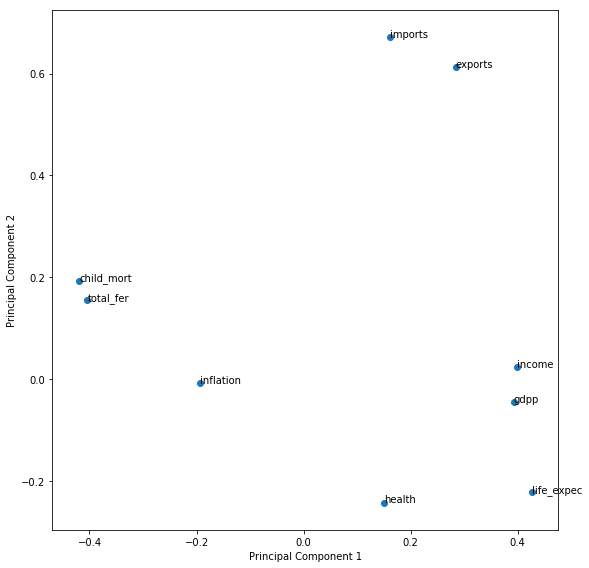

In [81]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [82]:
pca.explained_variance_

array([4.13565658, 1.54634631, 1.1703833 , 0.99478456, 0.66061903,
       0.22358112, 0.11343874, 0.08831536, 0.06687501])

In [83]:
print("pca.explained_variance_ratio_: ",pca.explained_variance_ratio_.round(3)*100)

pca.explained_variance_ratio_:  [46.  17.2 13.  11.1  7.3  2.5  1.3  1.   0.7]


In [84]:
print (pca.explained_variance_ratio_.cumsum())

[0.4595174  0.63133365 0.76137624 0.87190786 0.94530998 0.97015232
 0.98275663 0.99256944 1.        ]


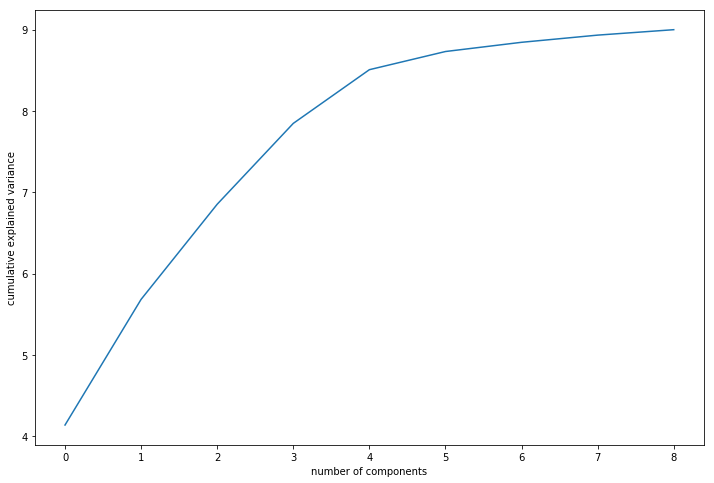

In [85]:
#Making the screeplot - plotting the cumulative variance against the number of components

import matplotlib.pyplot as plt
import numpy as np
from sklearn import  linear_model
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()


#Since the variance reaches maximum when number of components is 4 and after that saturates - we will take number of principak components to be 4

In [86]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)

In [87]:
df_train_pca = pca_final.fit_transform(normalized_df)


In [98]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

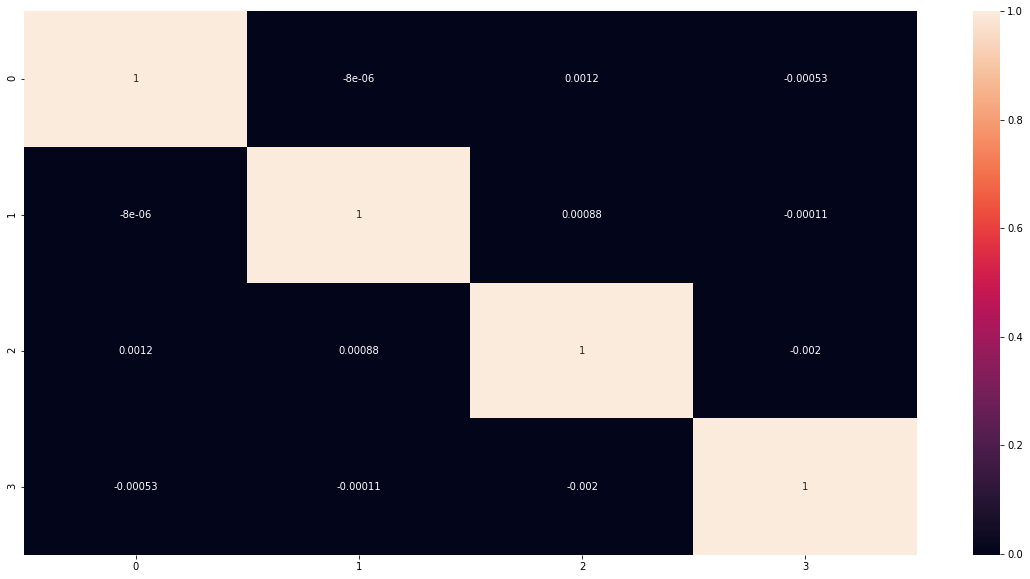

In [89]:
#plotting the correlation matrix

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [69]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
 

max corr: 0.0011961925092543056 , min corr:  -0.0020378295355501573


In [90]:
df.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [91]:
normalized_df.dtypes

child_mort    float64
exports       float64
health        float64
imports       float64
income        float64
inflation     float64
life_expec    float64
total_fer     float64
gdpp          float64
dtype: object

In [100]:
#Output of PCA

df_train_pca

array([[-2.90504953e+00,  8.80889580e-02,  7.18841261e-01,
         9.93710369e-01],
       [ 4.28070135e-01, -5.86096292e-01,  3.20089646e-01,
        -1.16768097e+00],
       [-2.82139745e-01, -4.45317863e-01, -1.22146183e+00,
        -8.47577887e-01],
       [-2.92218008e+00,  1.69434077e+00, -1.51717157e+00,
         8.73339848e-01],
       [ 1.02889318e+00,  1.30096737e-01,  1.92343951e-01,
        -8.42274895e-01],
       [ 2.83846572e-02, -1.75145297e+00, -7.91140619e-01,
        -5.23290042e-02],
       [-1.02540528e-01, -5.65774300e-01, -2.76836260e-01,
        -1.45394825e+00],
       [ 2.33244068e+00, -1.99212821e+00, -2.36341207e-01,
         1.12909454e+00],
       [ 2.96494167e+00, -7.32646016e-01,  5.46776474e-01,
         1.18898493e+00],
       [-1.79466250e-01, -3.92571564e-01, -8.61663738e-01,
        -4.25377273e-01],
       [ 1.26227794e+00, -6.63093362e-01,  4.52173180e-01,
         5.93004990e-02],
       [ 1.66572736e+00,  5.58713689e-01, -1.01710933e+00,
      

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [97]:
pca_final


IncrementalPCA(batch_size=None, copy=True, n_components=4, whiten=False)

In [101]:
#Calculate Hopkins score

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [205]:
df_train_pca

array([[-2.90504953e+00,  8.80889580e-02,  7.18841261e-01,
         9.93710369e-01],
       [ 4.28070135e-01, -5.86096292e-01,  3.20089646e-01,
        -1.16768097e+00],
       [-2.82139745e-01, -4.45317863e-01, -1.22146183e+00,
        -8.47577887e-01],
       [-2.92218008e+00,  1.69434077e+00, -1.51717157e+00,
         8.73339848e-01],
       [ 1.02889318e+00,  1.30096737e-01,  1.92343951e-01,
        -8.42274895e-01],
       [ 2.83846572e-02, -1.75145297e+00, -7.91140619e-01,
        -5.23290042e-02],
       [-1.02540528e-01, -5.65774300e-01, -2.76836260e-01,
        -1.45394825e+00],
       [ 2.33244068e+00, -1.99212821e+00, -2.36341207e-01,
         1.12909454e+00],
       [ 2.96494167e+00, -7.32646016e-01,  5.46776474e-01,
         1.18898493e+00],
       [-1.79466250e-01, -3.92571564e-01, -8.61663738e-01,
        -4.25377273e-01],
       [ 1.26227794e+00, -6.63093362e-01,  4.52173180e-01,
         5.93004990e-02],
       [ 1.66572736e+00,  5.58713689e-01, -1.01710933e+00,
      

In [172]:
df_kmeans = pd.DataFrame({'Comp1':df_train_pca[:,0],'Comp2':df_train_pca[:,1] , 'Comp3' : df_train_pca[:,2] , 'Comp4' :df_train_pca[:,3]})
print(df_kmeans)


        Comp1     Comp2     Comp3     Comp4
0   -2.905050  0.088089  0.718841  0.993710
1    0.428070 -0.586096  0.320090 -1.167681
2   -0.282140 -0.445318 -1.221462 -0.847578
3   -2.922180  1.694341 -1.517172  0.873340
4    1.028893  0.130097  0.192344 -0.842275
5    0.028385 -1.751453 -0.791141 -0.052329
6   -0.102541 -0.565774 -0.276836 -1.453948
7    2.332441 -1.992128 -0.236341  1.129095
8    2.964942 -0.732646  0.546776  1.188985
9   -0.179466 -0.392572 -0.861664 -0.425377
10   1.262278 -0.663093  0.452173  0.059300
11   1.665727  0.558714 -1.017109 -0.177980
12  -1.124037 -0.966077 -0.609811 -1.159623
13   1.076855 -0.485220  0.647580 -0.531959
14   0.581791  0.551733 -0.429355 -1.050560
15   3.136005  0.665277  0.705964  1.064053
16   0.208717  0.688145  0.229818 -1.087832
17  -2.671162  0.390062  0.138931  0.320869
18  -0.157122  0.774914  0.268925 -1.043274
19  -0.792149 -0.122805 -0.434579 -0.706632
20   0.994795 -0.963264  1.580119 -0.675520
21  -0.878901  0.460547  0.61850

In [173]:
colnames = list(df_kmeans.columns)
print(colnames)
#pcs_df = pd.Dataframe({'PC1':pca_components_[0],'PC2' : pca_components_[1] , 'Feature' :colnames})

['Comp1', 'Comp2', 'Comp3', 'Comp4']


In [174]:
hopkins(df_kmeans)

0.829066357339715

In [175]:
#Importing Libraries
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

#### Kmeans with K=5
model_clus5 = KMeans(n_clusters = 5, max_iter=50)
model_clus5.fit(df_kmeans)

In [176]:
## Silhouette Analysis

#$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

#$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

#$q$ is the mean intra-cluster distance to all the points in its own cluster.

#* The value of the silhouette score range lies between -1 to 1. 

#* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

#* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(df_kmeans)
    sse_.append([k, silhouette_score(df_kmeans, kmeans.labels_)])

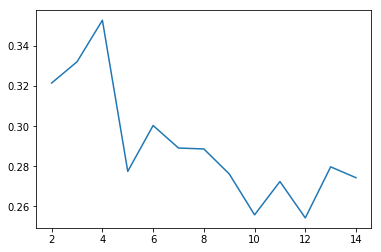

In [177]:


plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

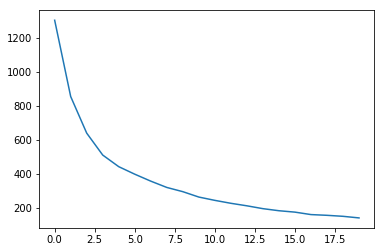

In [178]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df_kmeans)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [181]:
# analysis of clusters Clu
df_kmeans.index = pd.RangeIndex(len(df_kmeans.index))
df_km = pd.concat([df_kmeans, pd.Series(model_clus5.labels_)], axis=1)
df_km.columns = ['Comp1', 'Comp2', 'Comp3', 'Comp4' , 'ClusterID']

df_clusters_col1 = 	pd.DataFrame(df_km.groupby(["ClusterID"]).Comp1.mean())
df_clusters_col2 = 	pd.DataFrame(df_km.groupby(["ClusterID"]).Comp2.mean())
df_clusters_col3 = 	pd.DataFrame(df_km.groupby(["ClusterID"]).Comp3.mean())

df_clusters_col4 = 	pd.DataFrame(df_km.groupby(["ClusterID"]).Comp4.mean())


In [196]:
df_km.head()

,Comp1,Comp2,Comp3,Comp4,ClusterID
0,-2.905050,0.088089,0.718841,0.993710,3
1,0.428070,-0.586096,0.320090,-1.167681,0
2,-0.282140,-0.445318,-1.221462,-0.847578,2
3,-2.922180,1.694341,-1.517172,0.873340,3
4,1.028893,0.130097,0.192344,-0.842275,0


C:\Users\bindh\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


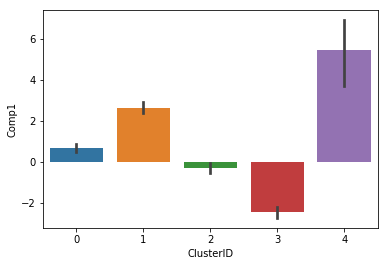

In [182]:
sns.barplot(x=df_km.ClusterID, y=df_km.Comp1)


C:\Users\bindh\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


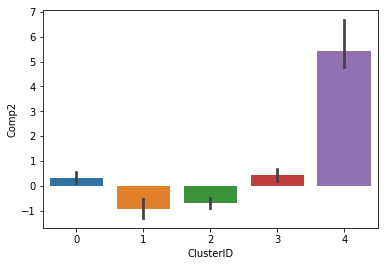

In [184]:
sns.barplot(x=df_km.ClusterID, y=df_km.Comp2)

C:\Users\bindh\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


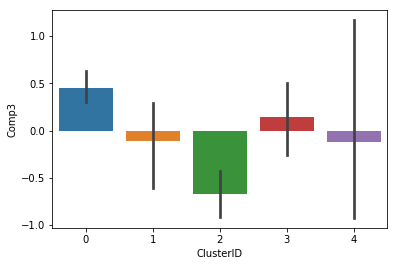

In [185]:
sns.barplot(x=df_km.ClusterID, y=df_km.Comp3)

C:\Users\bindh\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


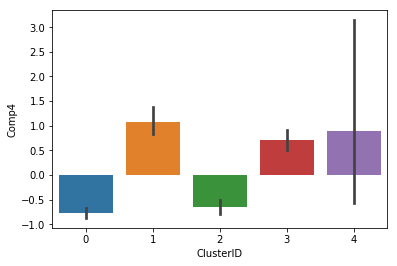

In [187]:
sns.barplot(x=df_km.ClusterID, y=df_km.Comp4)

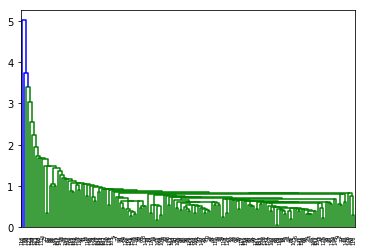

In [188]:
# heirarchical clustering
mergings = linkage(df_kmeans, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

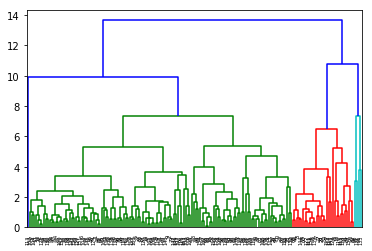

In [189]:
mergings = linkage(df_kmeans, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [190]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 5).reshape(-1,))
df_hc = pd.concat([df_kmeans, clusterCut], axis=1)
df_hc.columns = ['Comp1', 'Comp2', 'Comp3', 'Comp4', 'ClusterID']

In [195]:
df_hc.head()

,Comp1,Comp2,Comp3,Comp4,ClusterID
0,-2.905050,0.088089,0.718841,0.993710,0
1,0.428070,-0.586096,0.320090,-1.167681,0
2,-0.282140,-0.445318,-1.221462,-0.847578,0
3,-2.922180,1.694341,-1.517172,0.873340,0
4,1.028893,0.130097,0.192344,-0.842275,0


In [256]:
#summarise
df_clusters_col1 = pd.DataFrame(df_hc.groupby(["ClusterID"]).Comp1.mean())
df_clusters_col2 = pd.DataFrame(df_hc.groupby(["ClusterID"]).Comp2.mean())
df_clusters_col3 = 	pd.DataFrame(df_hc.groupby(["ClusterID"]).Comp3.mean())
df_clusters_col4 = 	pd.DataFrame(df_hc.groupby(["ClusterID"]).Comp4.mean())
#print(df_clusters_col1, df_clusters_col2, df_clusters_col3, df_clusters_col4)



5

In [203]:
df = pd.concat([pd.Series([0,1,2,3,4]), df_clusters_col1, df_clusters_col2, df_clusters_col3,df_clusters_col4], axis=1)
df

,0,Comp1,Comp2,Comp3,Comp4
0,0,-0.675637,0.040102,0.113760,-0.255450
1,1,2.433586,-0.789872,-0.299811,0.962806
2,2,6.331920,5.752845,-0.765213,1.617367
3,3,2.633871,3.843116,0.747731,-0.980400
4,4,-4.864295,0.040686,-5.573507,2.343059


In [249]:
clustered_df = pd.concat([df, df_hc], axis=1)
countries_With_lower_metrics = clustered_df.loc[clustered_df['ClusterID'] == 0]

print(countries_With_lower_metrics)

                            country  child_mort  exports  health  imports  \
0                       Afghanistan        90.2    10.00    7.58     44.9   
1                           Albania        16.6    28.00    6.55     48.6   
2                           Algeria        27.3    38.40    4.17     31.4   
3                            Angola       119.0    62.30    2.85     42.9   
4               Antigua and Barbuda        10.3    45.50    6.03     58.9   
5                         Argentina        14.5    18.90    8.10     16.0   
6                           Armenia        18.1    20.80    4.40     45.3   
9                        Azerbaijan        39.2    54.30    5.88     20.7   
10                          Bahamas        13.8    35.00    7.89     43.7   
12                       Bangladesh        49.4    16.00    3.52     21.8   
13                         Barbados        14.2    39.50    7.97     48.7   
14                          Belarus         5.5    51.40    5.61     64.5   

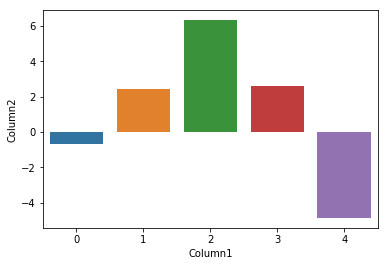

In [168]:
#plotting barplot
sns.barplot(x=df.Column1, y=df.Column2)

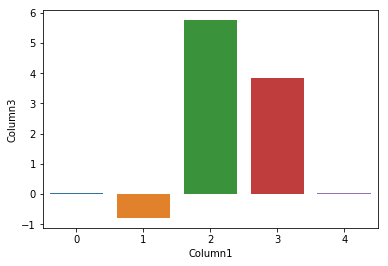

In [169]:
sns.barplot(x=df.Column1, y=df.Column3)

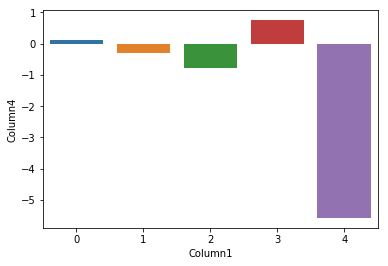

In [170]:
sns.barplot(x=df.Column1, y=df.Column4)

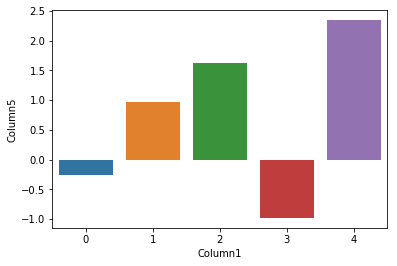

In [171]:
sns.barplot(x=df.Column1, y=df.Column5)